
### Created By: Mrinal Bhan


### Tasks

Experiment Number -01: Write a program to perform the following operation on images:
- Remove Noise
- Blurred images to Deblurring images
- Remove Watermarking,
- Remove background.

In [171]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Remove Noise

In [172]:
def remove_noise(image):
    """Remove noise from the image using a Gaussian blur."""
    denoised_image = cv2.medianBlur(image, 3)
    return denoised_image

### Blurred images to Deblurring images

In [173]:
def deblur_image(image):
    """Deblur the image using a deconvolution algorithm (Richardson-Lucy)."""
    kernel = np.ones((5, 5), np.float32) / 25
    deblurred_image = cv2.filter2D(image, -1, kernel)
    return deblurred_image

def sharpen_image(image, amount):
    """Sharpen the image using unsharp masking."""
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    sharpened = cv2.addWeighted(image, 1.0 + amount, blurred, -amount, 0)
    return sharpened

### Remove background

In [174]:
def remove_background(image):
    """Remove the background from the image using a chroma keying technique."""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([70, 255, 255])
    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

### Load an image

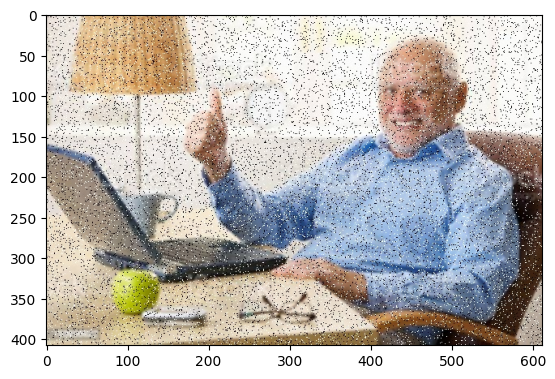

In [175]:
image_path = 'image_noise.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### Remove noise

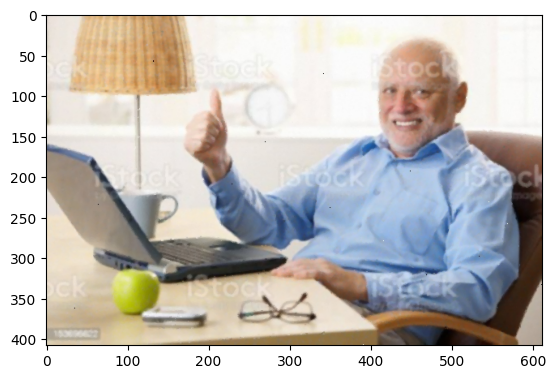

In [176]:
denoised_image = remove_noise(image)
plt.imshow(denoised_image)
plt.show()

### Deblur the image

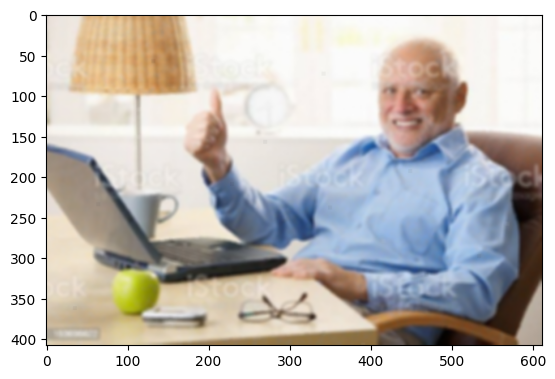

In [177]:
deblurred_image = deblur_image(denoised_image)
# sharpened_image = sharpen_image(deblurred_image, amount=0.8)
plt.imshow(deblurred_image)
plt.show()

### Remove watermark

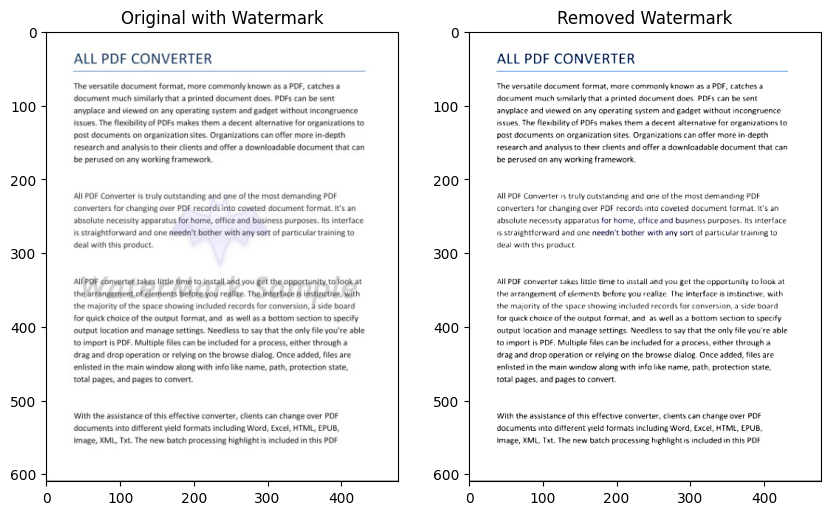

In [178]:
import cv2
import numpy as np

img = cv2.imread("veidz.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original with Watermark")
plt.imshow(img)

alpha = 2.0
beta = -160

new = alpha * img + beta
new = np.clip(new, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 2)
plt.title("Removed Watermark")
plt.imshow(new)
plt.show()


### Remove background

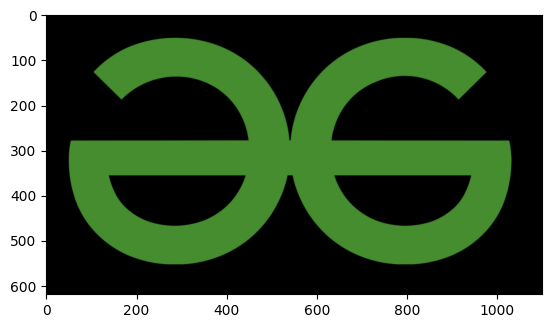

In [180]:
# Function to remove background from an image using GrabCut algorithm
def remove_background(image):
    # Create a mask for the foreground and background
    mask = np.zeros(image.shape[:2], np.uint8)

    # Define a rectangle around the object (you may need to adjust this)
    rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

    # Apply GrabCut algorithm to segment the foreground and background
    cv2.grabCut(image, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

    # Create a binary mask where the foreground is marked as likely or definite
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Multiply the original image by the mask to remove the background
    background_removed_image = image * mask2[:, :, np.newaxis]
    return background_removed_image


# remove the background from the image
image = cv2.imread('happyth.png')
background_removed_image = remove_background(image)
plt.imshow(background_removed_image)
plt.show()


### Display the resulting image

In [ ]:
plt.imshow("Result")
plt.show()